In [ ]:
# S04

In [ ]:
pip install lifelines

     |████████████████████████████████| 348 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=51d3c0e6c0c407f575a6c16d523dad500ee531f6160d6d6779d89e44758e40cb
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

In [ ]:
# reading dataset
data = pd.read_csv('/content/drive/MyDrive/Data Mining for Business in Python-20210706T154929Z-001/Data Mining for Business in Python/1. Survival Analysis/lung.csv')

In [ ]:
# head
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
#transforming dependent variable
data.loc[data.status == 1, "status"] = 0
data.loc[data.status == 2, "status"] = 1

In [ ]:
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


# Kaplan Meyer Estimator

In [ ]:
# importing KaplanMeierFitter using the lifelines library
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = data.time, event_observed = data.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [ ]:
model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [ ]:
# S05 Survival Curves

Text(0, 0.5, 'Survival')

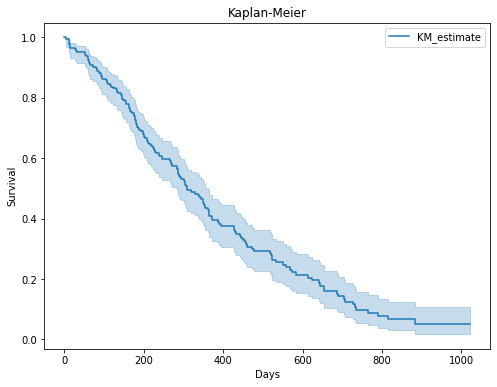

In [ ]:
# survival curve
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

 S07 Log Rank Test

In [ ]:
# creating dataframe into male and female
male = data[data['sex']==1]
female = data[data['sex']==2]

In [ ]:
male.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [ ]:
# Kaplan meier estimator for male dataset
model_male = KaplanMeierFitter()
model_male.fit(durations = male.time, event_observed = male.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 138 total observations, 26 right-censored observations>

In [ ]:
# Kaplan meier estimator for female dataset
model_female = KaplanMeierFitter()
model_female.fit(durations = female.time, event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

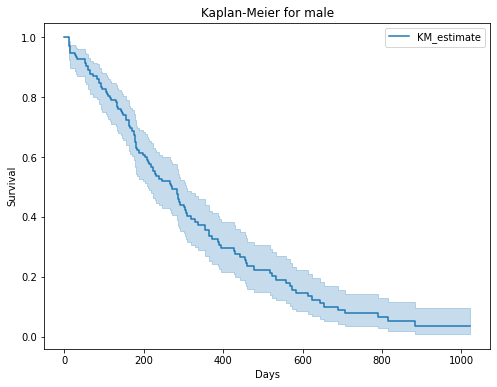

In [ ]:
# survival curve for male
model_male.plot(figsize = (8,6))
plt.title("Kaplan-Meier for male")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

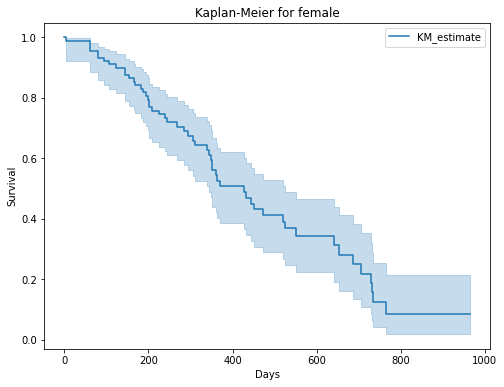

In [ ]:
# survival curve for female
model_female.plot(figsize = (8,6))
plt.title("Kaplan-Meier for female")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

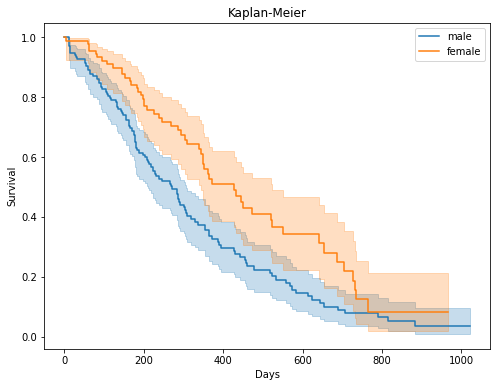

In [ ]:
model_male.plot(figsize = (8,6),label = 'male')
model_female.plot(label = 'female')
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")


In [ ]:
# log rank test
from lifelines.statistics import logrank_test
logrank_test(durations_A=male.time,
             durations_B=female.time,
             event_observed_A=male.status,
             event_observed_B=female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57